## Instructions

1. Download the [Stockfish App](https://github.com/official-stockfish/Stockfish).  This can be installed on Mac with the terminal command `brew install stockfish`.
2. Install the `stockfish` [Python API wrapper](https://pypi.org/project/stockfish/).  This can be installed with `pip install stockfish`.
3. Install the `chess` library with `pip install chess`.

## Imports

In [376]:
from stockfish import Stockfish
import chess
import numpy as np
import matplotlib.pyplot as plt

import time
import re

## `chess` Library

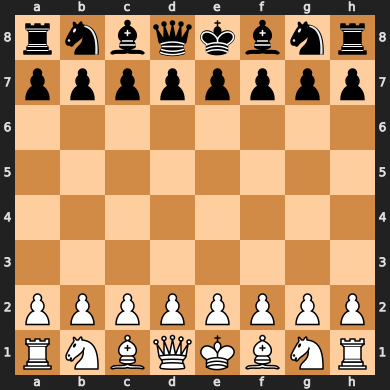

In [6]:
#Display the initial board position
board = chess.Board()
board

In [8]:
#See legal moves on current position
board.legal_moves

<LegalMoveGenerator at 0x7fd59110dbb0 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

In [10]:
#Check whether this is a checkmate
board.is_checkmate()

False

### Making moves using Standard Algebraic Notation

In [11]:
board.push_san('e2e4')
# Could also have just used 'e4' here since only one piece can move to e4

Move.from_uci('e2e4')

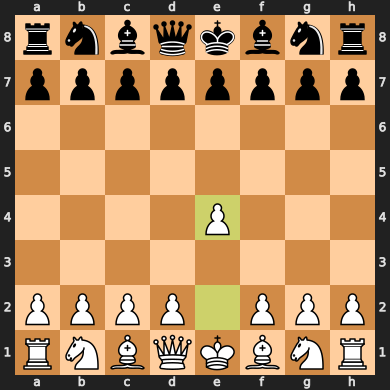

In [12]:
#Display updated board
board

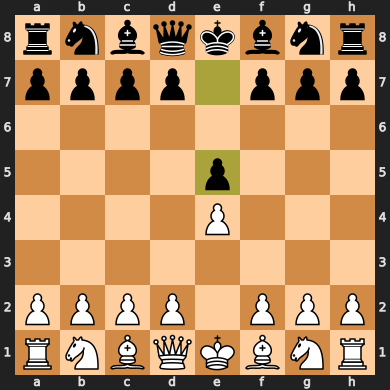

In [13]:
#Make another move
board.push_san('e7e5')
board

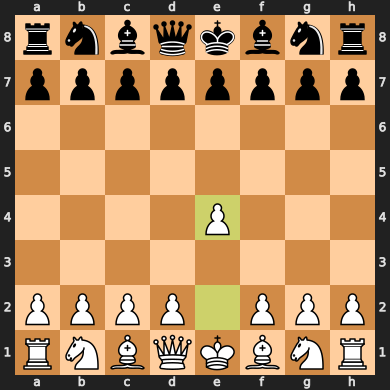

In [14]:
#Undo the last move
board.pop()
board

### Get the urrent board state in Forsyth-Edwards Notation

In [26]:
pos = board.fen()
pos

'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1'

## Stockfish

In [358]:
#Change the path to be the path to the stockfish *app* on your machine (not the Python API wrapper library)
sf = Stockfish('/opt/homebrew/bin/stockfish', depth=16)

In [359]:
sf.update_engine_parameters({
    'Threads':7,
    "Hash":2048
})

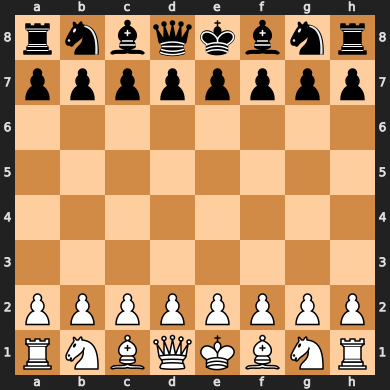

In [360]:
#Display the initialized position from Stockfish
board = chess.Board(sf.get_fen_position())
board

In [361]:
sf.get_top_moves(20)

[{'Move': 'e2e4', 'Centipawn': 46, 'Mate': None},
 {'Move': 'd2d4', 'Centipawn': 37, 'Mate': None},
 {'Move': 'g1f3', 'Centipawn': 34, 'Mate': None},
 {'Move': 'e2e3', 'Centipawn': 24, 'Mate': None},
 {'Move': 'c2c4', 'Centipawn': 22, 'Mate': None},
 {'Move': 'g2g3', 'Centipawn': 21, 'Mate': None},
 {'Move': 'c2c3', 'Centipawn': 1, 'Mate': None},
 {'Move': 'b1c3', 'Centipawn': 0, 'Mate': None},
 {'Move': 'd2d3', 'Centipawn': -9, 'Mate': None},
 {'Move': 'b2b3', 'Centipawn': -11, 'Mate': None},
 {'Move': 'h2h3', 'Centipawn': -11, 'Mate': None},
 {'Move': 'a2a4', 'Centipawn': -12, 'Mate': None},
 {'Move': 'a2a3', 'Centipawn': -13, 'Mate': None},
 {'Move': 'b2b4', 'Centipawn': -31, 'Mate': None},
 {'Move': 'f2f4', 'Centipawn': -32, 'Mate': None},
 {'Move': 'h2h4', 'Centipawn': -37, 'Mate': None},
 {'Move': 'g1h3', 'Centipawn': -54, 'Mate': None},
 {'Move': 'f2f3', 'Centipawn': -67, 'Mate': None},
 {'Move': 'b1a3', 'Centipawn': -68, 'Mate': None},
 {'Move': 'g2g4', 'Centipawn': -125, 'Mate

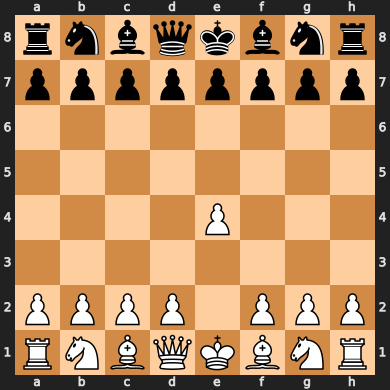

In [362]:
#Change the position to one that we read in from a FEN string
sf.set_fen_position(pos)

#Display the initialized position from Stockfish
board = chess.Board(sf.get_fen_position())
board

In [363]:
len(list(board.legal_moves))

20

## Getting the top 20 moves

In [364]:
start=time.time()
sf.get_top_moves(20)
end=time.time()

In [365]:
#How long did it take to get the top 20 moves?
end - start

2.679800033569336

In [366]:
sf.get_top_moves(20)

[{'Move': 'e7e5', 'Centipawn': 25, 'Mate': None},
 {'Move': 'c7c6', 'Centipawn': 34, 'Mate': None},
 {'Move': 'c7c5', 'Centipawn': 42, 'Mate': None},
 {'Move': 'e7e6', 'Centipawn': 49, 'Mate': None},
 {'Move': 'b8c6', 'Centipawn': 49, 'Mate': None},
 {'Move': 'd7d5', 'Centipawn': 53, 'Mate': None},
 {'Move': 'd7d6', 'Centipawn': 57, 'Mate': None},
 {'Move': 'a7a6', 'Centipawn': 58, 'Mate': None},
 {'Move': 'g8f6', 'Centipawn': 60, 'Mate': None},
 {'Move': 'g7g6', 'Centipawn': 61, 'Mate': None},
 {'Move': 'h7h6', 'Centipawn': 81, 'Mate': None},
 {'Move': 'a7a5', 'Centipawn': 82, 'Mate': None},
 {'Move': 'b7b6', 'Centipawn': 85, 'Mate': None},
 {'Move': 'b8a6', 'Centipawn': 96, 'Mate': None},
 {'Move': 'h7h5', 'Centipawn': 110, 'Mate': None},
 {'Move': 'g8h6', 'Centipawn': 111, 'Mate': None},
 {'Move': 'f7f6', 'Centipawn': 130, 'Mate': None},
 {'Move': 'f7f5', 'Centipawn': 145, 'Mate': None},
 {'Move': 'b7b5', 'Centipawn': 162, 'Mate': None},
 {'Move': 'g7g5', 'Centipawn': 171, 'Mate': N

## Getting the top 10 moves

It's important to note that Stockfish will take *less time to compute the top n moves* if it has already made that computation.  So to get an accurate estimate of how long it takes to compute things, we should make a new instance of Stockfish for comparison.

In [367]:
sf = Stockfish('/opt/homebrew/bin/stockfish', depth=16)

In [368]:
sf.update_engine_parameters({
    'Threads':7,
    "Hash":2048,
})

In [369]:
sf.get_parameters()

{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 7,
 'Hash': 2048}

In [370]:
#Set it to the same board position we used above to compute the top 20 moves
sf.set_fen_position(pos)

In [371]:
start=time.time()
sf.get_top_moves(10)
end=time.time()

In [372]:
#How long did it take to get the top 10 moves?
end - start

1.4404280185699463

In [373]:
sf.get_top_moves(10)

[{'Move': 'c7c6', 'Centipawn': 30, 'Mate': None},
 {'Move': 'e7e5', 'Centipawn': 31, 'Mate': None},
 {'Move': 'e7e6', 'Centipawn': 39, 'Mate': None},
 {'Move': 'c7c5', 'Centipawn': 40, 'Mate': None},
 {'Move': 'b8c6', 'Centipawn': 47, 'Mate': None},
 {'Move': 'd7d6', 'Centipawn': 51, 'Mate': None},
 {'Move': 'a7a6', 'Centipawn': 54, 'Mate': None},
 {'Move': 'g7g6', 'Centipawn': 60, 'Mate': None},
 {'Move': 'g8f6', 'Centipawn': 63, 'Mate': None},
 {'Move': 'd7d5', 'Centipawn': 66, 'Mate': None}]

In [374]:
sf.get_top_moves(10)

[{'Move': 'e7e5', 'Centipawn': 24, 'Mate': None},
 {'Move': 'c7c6', 'Centipawn': 27, 'Mate': None},
 {'Move': 'c7c5', 'Centipawn': 35, 'Mate': None},
 {'Move': 'e7e6', 'Centipawn': 44, 'Mate': None},
 {'Move': 'b8c6', 'Centipawn': 53, 'Mate': None},
 {'Move': 'd7d6', 'Centipawn': 56, 'Mate': None},
 {'Move': 'a7a6', 'Centipawn': 58, 'Mate': None},
 {'Move': 'd7d5', 'Centipawn': 59, 'Mate': None},
 {'Move': 'g7g6', 'Centipawn': 59, 'Mate': None},
 {'Move': 'g8f6', 'Centipawn': 71, 'Mate': None}]

## Some important observations

1. Finding just the top 10 moves takes *about half the time* of finding the top 20 moves (on this board position, when using a search depth of 15).
2. The "top 10 moves" here is not identical to the top 10 of the list of the top 20 moves computed earlier on the same board position!  The centipawn scores are slightly different, and hence the ranking order is different.
3. In fact, if you compute the "top 10 moves" a second time (or reinstantiate and compute them again), you may get a different answer (in terms of centipawn scores or rankings)!  This is because Stockfish's tree pruning algorithm uses randomness.

# Looking at Final Board Positions

In [336]:
sf.set_fen_position('7k/R7/1R6/1P6/3K2P1/2N4P/nr6/8 w - - 0 70')

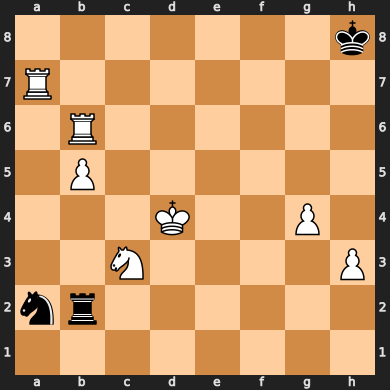

In [337]:
board = chess.Board(sf.get_fen_position())
board

In [338]:
sf.get_evaluation()

{'type': 'mate', 'value': 1}

In [339]:
sf.get_top_moves(10)

[{'Move': 'b6b8', 'Centipawn': None, 'Mate': 1},
 {'Move': 'a7a8', 'Centipawn': None, 'Mate': 3},
 {'Move': 'd4e5', 'Centipawn': None, 'Mate': 3},
 {'Move': 'd4c5', 'Centipawn': None, 'Mate': 3},
 {'Move': 'd4e3', 'Centipawn': None, 'Mate': 3},
 {'Move': 'd4c4', 'Centipawn': None, 'Mate': 4},
 {'Move': 'c3a2', 'Centipawn': 3610, 'Mate': None},
 {'Move': 'b6c6', 'Centipawn': 3588, 'Mate': None},
 {'Move': 'b6h6', 'Centipawn': 3587, 'Mate': None},
 {'Move': 'a7a2', 'Centipawn': 3579, 'Mate': None}]

We see from the above that if a position has a checkmate in a certain number of moves, Stockfish no longer gives centipawn evaluations.

#### Get Win-Draw-Loss Stats

In [311]:
sf.get_wdl_stats()

[1000, 0, 0]

#### Switching Black and White and looking at the same position

In [308]:
sf.set_fen_position('7K/r7/1r6/1p6/3k2p1/2n4p/NR6/8 b - - 70 0')

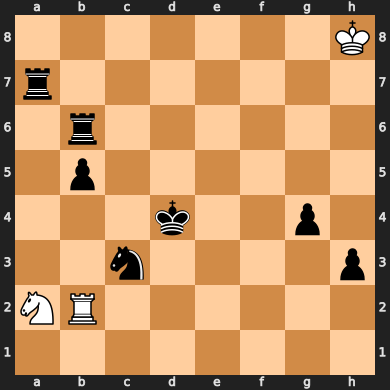

In [309]:
board = chess.Board(sf.get_fen_position())
board

In [310]:
sf.get_top_moves(10)

[{'Move': 'b6b8', 'Centipawn': None, 'Mate': -1},
 {'Move': 'd4c5', 'Centipawn': None, 'Mate': -3},
 {'Move': 'a7a8', 'Centipawn': None, 'Mate': -3},
 {'Move': 'd4e3', 'Centipawn': None, 'Mate': -3},
 {'Move': 'h3h2', 'Centipawn': None, 'Mate': -5},
 {'Move': 'c3a2', 'Centipawn': None, 'Mate': -7},
 {'Move': 'a7a2', 'Centipawn': None, 'Mate': -9},
 {'Move': 'd4c4', 'Centipawn': None, 'Mate': -14},
 {'Move': 'g4g3', 'Centipawn': None, 'Mate': -15},
 {'Move': 'b6h6', 'Centipawn': -4795, 'Mate': None}]

# Playing out a sequences of moves from an actual game

Stockfish cannot accept a move notated in a way that only specifies the *final location* of the piece that moves; it needs both the *starting location* and the *final location* of the piece that moved.  For example, on the starting board position, the move "Pawn on e2 goes to e4" (king's pawn opening) is often notated simply as "e4" since there is no other piece that could move to e4 from the initial board state.  However, Stockfish would throw an error if you ask it to update the board position (from the starting position) using the move "e4".

Since the game data we will be using notates moves in the shortened form (like "e4"), we will need to use the `chess` package to keep track of the board positions.  Then we can simply output the board positions as FEN strings and feed these to Stockfish to get an evaluation of the position.

In [401]:
game1 = 'e4 e5  Nf3 Nf6  Nxe5 Nxe4  Qe2 Qe7  Qxe4 d6  d4 dxe5  dxe5 Qb4+  Qxb4 Bxb4+  Bd2 a5  Bxb4 axb4  Nd2 Bf5  O-O-O O-O  b3 Rxa2  Kb1 Rxc2  Ka1 Rd8  Bc4 Nc6  Nf3 Ra8+  Kb1 Rxc4+  Kb2 Rc2+  Kb1 Rxf2+  Kc1 Ra1#'
game2 = 'c4   g6   Nc3   Bg7   d4   d6   Nf3   Nf6   e4   Bg4   Be3   O-O   Be2   Nc6   O-O   a6   h3   Bxf3   Bxf3   Qc8   Be2   Nd8   d5   Ne8   Qb3   c5   a4   Nc7   a5   Rb8   Rfd1   b5   axb6   Na8   Qc2   Rxb6   Bg5   Qb7   Na4   Bxb2   Rab1   Bf6   Bxf6   Rxb1   Rxb1   Qd7   Bg4   Qxa4   Qxa4   exf6   Qxa6   Nc7   Qxd6   Ne8   Qxd8   Ng7   Rb8   Rxd8   Rxd8+   Ne8   Rxe8+   Kg7   d6   f5   exf5   gxf5   Bxf5   f6   d7   Kh6   d8=Q   Kg5   Rg8+   Kxf5'

In [402]:
moves = re.split('\s+', game2)
print(moves)

['c4', 'g6', 'Nc3', 'Bg7', 'd4', 'd6', 'Nf3', 'Nf6', 'e4', 'Bg4', 'Be3', 'O-O', 'Be2', 'Nc6', 'O-O', 'a6', 'h3', 'Bxf3', 'Bxf3', 'Qc8', 'Be2', 'Nd8', 'd5', 'Ne8', 'Qb3', 'c5', 'a4', 'Nc7', 'a5', 'Rb8', 'Rfd1', 'b5', 'axb6', 'Na8', 'Qc2', 'Rxb6', 'Bg5', 'Qb7', 'Na4', 'Bxb2', 'Rab1', 'Bf6', 'Bxf6', 'Rxb1', 'Rxb1', 'Qd7', 'Bg4', 'Qxa4', 'Qxa4', 'exf6', 'Qxa6', 'Nc7', 'Qxd6', 'Ne8', 'Qxd8', 'Ng7', 'Rb8', 'Rxd8', 'Rxd8+', 'Ne8', 'Rxe8+', 'Kg7', 'd6', 'f5', 'exf5', 'gxf5', 'Bxf5', 'f6', 'd7', 'Kh6', 'd8=Q', 'Kg5', 'Rg8+', 'Kxf5']


In [403]:
len(moves)

74

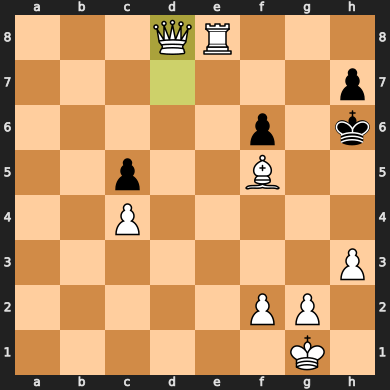

In [404]:
board = chess.Board()
for move in moves[:71]:
    board.push_san(move)

board

In [407]:
#Get the FEN string representing this position
board.fen()

'3QR3/7p/5p1k/2p2B2/2P5/7P/5PP1/6K1 b - - 0 36'

In [405]:
#Initialize Stockfish
sf = Stockfish('/opt/homebrew/bin/stockfish', depth=16)
sf.update_engine_parameters({
    'Threads':7,
    "Hash":2048,
})

In [411]:
#Set the position of Stockfish to the same board position as above
sf.set_fen_position(board.fen())

#Get the "top 10" moves (there are actually only 3 legal moves for Black)
sf.get_top_moves(10)

[{'Move': 'h6g5', 'Centipawn': None, 'Mate': 3},
 {'Move': 'h6g7', 'Centipawn': None, 'Mate': 3},
 {'Move': 'h6h5', 'Centipawn': None, 'Mate': 2}]

## Looking at the "Expectation of Game Outomce" function

### Elo

In [43]:
#Elo expectation function (input the ratings difference)
def elo_expectation(x):
    return 1/(1+10**(-x/400))

### Glicko with RD1 = RD2 = 45 (minimum on Lichess)

In [40]:
q = np.log(10)/400
q

0.005756462732485115

In [41]:
def g(x):
    return 1/(1+3 * (x**2) * (q**2)/((np.pi)**2) )**.5

In [47]:
RD1 = 45
RD2 = 45
const_min = g((RD1**2 + RD2**2)**.5)
const_min

0.9608056492144766

In [48]:
RD1 = 110
RD2 = 110
const_maxcertain = g((RD1**2 + RD2**2)**.5)
const_maxcertain

0.8040187777631235

In [44]:
def glicko_expectation(x, RD1, RD2):
    return 1/(1+10**(-x/400 * g((RD1**2 + RD2**2)**.5) ) ) 

In [45]:
def lichess_minRD_expectation(x):
    return glicko_expectation(x, 45, 45)

## Comparing Expectation Functions

In [73]:
xs = np.linspace(0,1200,1000)
elos = [elo_expectation(x) for x in xs]
glickos_minRD = [lichess_minRD_expectation(x) for x in xs]
glickos_maxcertainRD = [glicko_expectation(x, 110, 110) for x in xs]
glickos_startingRD = [glicko_expectation(x, 1000, 1000) for x in xs]
glickos_500RD = [glicko_expectation(x, 500, 500) for x in xs]

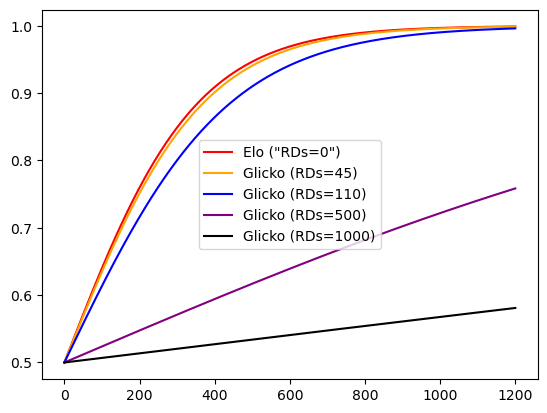

In [74]:
plt.plot(xs, elos, 'r', label='Elo ("RDs=0")')
plt.plot(xs, glickos_minRD, 'orange', label='Glicko (RDs=45)')
plt.plot(xs, glickos_maxcertainRD, 'blue', label='Glicko (RDs=110)')
plt.plot(xs, glickos_500RD, 'purple', label='Glicko (RDs=500)')
plt.plot(xs, glickos_startingRD, 'black', label='Glicko (RDs=1000)')
plt.legend()

In [76]:
xs = np.linspace(0,500,1000)
elos = [elo_expectation(x) for x in xs]
glickos_minRD = [lichess_minRD_expectation(x) for x in xs]
glickos_maxcertainRD = [glicko_expectation(x, 110, 110) for x in xs]
glickos_startingRD = [glicko_expectation(x, 1000, 1000) for x in xs]
glickos_500RD = [glicko_expectation(x, 500, 500) for x in xs]

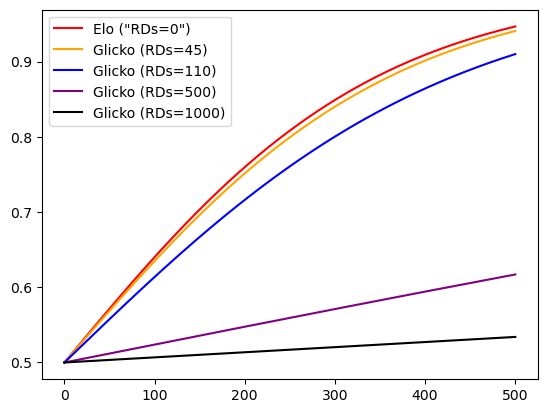

In [77]:
plt.plot(xs, elos, 'r', label='Elo ("RDs=0")')
plt.plot(xs, glickos_minRD, 'orange', label='Glicko (RDs=45)')
plt.plot(xs, glickos_maxcertainRD, 'blue', label='Glicko (RDs=110)')
plt.plot(xs, glickos_500RD, 'purple', label='Glicko (RDs=500)')
plt.plot(xs, glickos_startingRD, 'black', label='Glicko (RDs=1000)')
plt.legend()